Summary of magicblast


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import pathlib
import warnings
warnings.filterwarnings('ignore')

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [3]:
PROJECT_CODE='PRJNA573298'
BASE_PATH = f'/mnt/1TB_0/Data/Assembly/{PROJECT_CODE}/'

dbname='nt'
kmer='k141'

#magicblast on contigs
magic_blast_sam_tail=f'_{dbname}_final_contigs_magicBLAST.sam'
f_contigs_file_tail=f'_{dbname}_magic_blast_asc_contigs.txt'
GIS,ACCESSIONS,TITLES=None,None,None

### All SRA's

In [4]:
sra_list=['SRR10168373','SRR10168374',\
      'SRR10168375','SRR10168376',\
      'SRR10168377','SRR10168378',\
      'SRR10168379','SRR10168380',\
      'SRR10168381','SRR10168382',\
      'SRR10168383','SRR10168384',\
      'SRR10168385','SRR10168386',\
      'SRR10168387','SRR10168388',\
      'SRR10168389','SRR10168390',\
     'SRR10168391','SRR10168392','SRR10168393']

In [5]:
def read_gi_accession_title(gi_asc_file):
    gis=[]
    accessions=[]
    titles=[]
    with open(gi_asc_file, 'r') as infile:
        data = infile.readlines()
        for i in data:
            output=i.split(' ',2)
            gis.append(output[0])
            accessions.append(output[1])
            titles.append(output[2])
    return gis, accessions, titles

In [6]:
def set_accessions():
    global GIS
    global ACCESSIONS
    global TITLES
    GIS,ACCESSIONS,TITLES=read_gi_accession_title('/mnt/1TB_ssd/Data/BLAST/nt.gi_taxid.tsv')

### Stats

In [7]:
def get_asc_descr_count(sra): 
    accessions=[]
    descriptions=[]
    counts=[]
    path = BASE_PATH+sra+'/magic_blast/'
    with open(path+f'{sra}_{dbname}_{kmer}_magicBLAST_summary.txt', 'r') as f:
        lines = [line.rstrip('\n') for line in f]
        total=len(lines)-1
        for line in lines:
            if not 'database:' in line: #ignore header
                asc=line.split(None, 1)[0]
                title=line.split(None, 1)[1].split(', count:')[0]
                count=line.split(None, 1)[1].split(', count:')[1]
                accessions.append(asc)
                descriptions.append(title)
                counts.append(int(count))
    return accessions, descriptions, counts, total


In [8]:
def get_indexes(substr, str_list):
    index_list = []
    i = 0
    for e in str_list:
        if substr in e.lower():
            index_list.append(i)
        i +=1
    return index_list

In [9]:
for i,sra in enumerate(sra_list):
    accessions, descriptions, counts, total=get_asc_descr_count(sra)
    print(f'{sra}, matched contigs: {sum(counts)}')
    #for d,c in zip(descriptions, counts):
    #    print(f'{d}: {c}')
    #print('\n')

SRR10168373, matched contigs: 4348
SRR10168374, matched contigs: 4669
SRR10168375, matched contigs: 43799
SRR10168376, matched contigs: 23385
SRR10168377, matched contigs: 19599
SRR10168378, matched contigs: 14969
SRR10168379, matched contigs: 45840
SRR10168380, matched contigs: 33249
SRR10168381, matched contigs: 18395
SRR10168382, matched contigs: 3050
SRR10168383, matched contigs: 4954
SRR10168384, matched contigs: 15128
SRR10168385, matched contigs: 4704
SRR10168386, matched contigs: 2146
SRR10168387, matched contigs: 9448
SRR10168388, matched contigs: 4383
SRR10168389, matched contigs: 4398
SRR10168390, matched contigs: 8835
SRR10168391, matched contigs: 18251
SRR10168392, matched contigs: 35405
SRR10168393, matched contigs: 18335


In [10]:
def get_desc_count(qstring, descriptions, counts, lowercase=True):
    qd=[]
    qc=0
    for d,c in zip(descriptions, counts):
        if lowercase:
            if qstring.lower() in d.lower():
                qd.append(d)
                qc=qc+int(c)
        else:
            if qstring in d:
                qd.append(d)
                qc=qc+int(c)
    #print(f'qstring: {qstring}, descriptions: {len(descriptions)}, qd: {qd}, counts: {len(counts)}, qc: {qc}')
    return qd, qc
    

In [11]:
def get_desc_count_without(qstring, nqstring, descriptions, counts, lowercase=True):
    qd=[]
    qc=0
    for d,c in zip(descriptions, counts):
        if lowercase:
            if qstring.lower() in d.lower() and nqstring.lower() not in d.lower():
                qd.append(d)
                qc=qc+int(c)
        else:
            if qstring in d:
                qd.append(d)
                qc=qc+int(c)
    #print(f'qstring: {qstring}, descriptions: {len(descriptions)}, qd: {qd}, counts: {len(counts)}, qc: {qc}')
    return qd, qc

In [12]:
def get_descr(sra):
    accessions, descriptions, counts, total=get_asc_descr_count(sra)
    #print(f'sra: {sra}, accessions: {len(accessions)}, descriptions: {len(descriptions)}, counts: {len(counts)}, total: {total}')
    if total>0:
        human,humanc = get_desc_count('human', descriptions, counts) 
        homo_sapiens,homo_sapiensc = get_desc_count('homo sapiens', descriptions, counts)
        h_sapiens,h_sapiensc = get_desc_count('h.sapiens', descriptions, counts)
        human_contigs = human+homo_sapiens+h_sapiens
        human_counts = humanc+homo_sapiensc+h_sapiensc
        pangolin, pangolinc = get_desc_count('manis javanica', descriptions, counts) 
        pangolin_p, pangolin_pc = get_desc_count('manis pentadactyla', descriptions, counts) 
        pangolin=pangolin+pangolin_p
        pangolin_counts=pangolinc+pangolin_pc
        mouse,mousec = get_desc_count('mus musculus', descriptions, counts) 
        vector,vectorc= get_desc_count('vector', descriptions, counts) 
        pig,pigc = get_desc_count('sus scrofa', descriptions, counts)
        cat,catc = get_desc_count('felis catus', descriptions, counts)  
        tiger,tigerc = get_desc_count('panthera tigris', descriptions, counts) 
        dog,dogc = get_desc_count('canis lupus', descriptions, counts) 
        virus,virusc = get_desc_count_without('virus', 'retrovirus', descriptions, counts)  
        
        mulatta,mulattac = get_desc_count('mulatta', descriptions, counts) 
        troglodytes,troglodytesc = get_desc_count('troglodytes', descriptions, counts)
        pongo,pongoc =get_desc_count('pongo', descriptions, counts)  
        papio,papioc = get_desc_count('papio', descriptions, counts) 
        mandrillus,mandrillusc =get_desc_count('mandrillus', descriptions, counts)  
        cercocebus,cercocebusc =get_desc_count('cercocebus', descriptions, counts) 
        gelada,geladac =get_desc_count('gelada', descriptions, counts)  
        monkey = mulatta+troglodytes+pongo+papio+mandrillus+cercocebus+gelada
        monkey_counts = mulattac+troglodytesc+pongoc+papioc+mandrillusc+cercocebusc+geladac
        
        mustela,mustelac= get_desc_count('mustela', descriptions, counts) 

        pipistrellus,pipistrellusc =get_desc_count('pipistrellus', descriptions, counts) 
        rhinolophus,rhinolophusc = get_desc_count('rhinolophus', descriptions, counts) 
        pteropus,pteropusc = get_desc_count('pteropus', descriptions, counts) 
        myotis,myotisc = get_desc_count('myotis', descriptions, counts) 
        bat = pipistrellus + rhinolophus+pteropus+myotis
        bat_counts = pipistrellusc + rhinolophusc+pteropusc+myotisc
        
        mycoplasma,mycoplasmac = get_desc_count('mycoplasma', descriptions, counts) 
        
        lst = ['human', 'monkey', 'pangolin', 'mouse', 
                'pig', 'cat', 'tiger', 'dog', 'bat', 'virus', 'vector','mycoplasma','mustela']
        lengths = [human_counts, monkey_counts, pangolin_counts, mousec,  
                pigc, catc, tigerc, dogc, bat_counts, virusc, vectorc, mycoplasmac,mustelac]
        final_contigs=BASE_PATH+sra+'/megahit_default/final.contigs.fa'
        with open(final_contigs) as final_contigs_file:
            total_contigs=sum(1 for _ in final_contigs_file)
        res = [int(i) for i in counts]
        total_contigs_matched=sum(res)
        sra_l=[sra]*len(lst)
        fractions_matched = [human_counts/total_contigs_matched, monkey_counts/total_contigs_matched, pangolin_counts/total_contigs_matched, mousec/total_contigs_matched,  
                pigc/total_contigs_matched, catc/total_contigs_matched, tigerc/total_contigs_matched, dogc/total_contigs_matched, bat_counts/total_contigs_matched, 
                             virusc/total_contigs_matched, vectorc/total_contigs_matched, mycoplasmac/total_contigs_matched, mustelac/total_contigs_matched]
        pct_matched = [round(i * 100,2) for i in fractions_matched]
        df = pd.DataFrame(list(zip(sra_l, lst, lengths, pct_matched)),
                   columns =['SRA','Name', 'count', 'pct_matched'])
        return df
    return None

In [13]:
sns.set(rc={"figure.figsize":(4, 4)})
def plot_df(df, sra):
    ax=df.plot(x='Name', y='count', kind='bar')
    ax.set_title(sra, fontsize=12)
    #ax.set_yscale('log')
    #ax.set_ylim([0,df['count'].max()+10])
    ax.set_ylim(bottom=0)
    fig = plt.gcf()
    fig.savefig(BASE_PATH+sra+'/magic_blast/'+f'{sra}_{dbname}_{kmer}_magicBLAST_species.png', bbox_inches="tight")

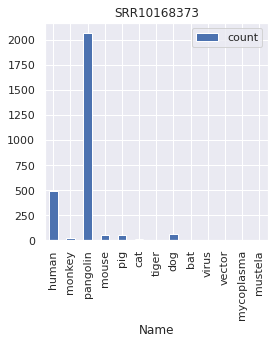

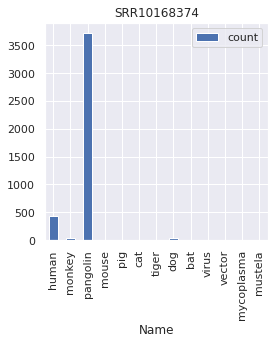

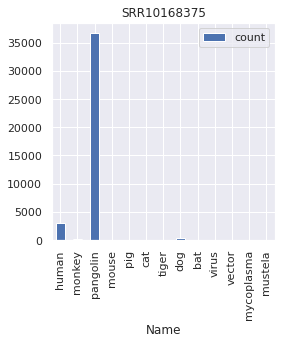

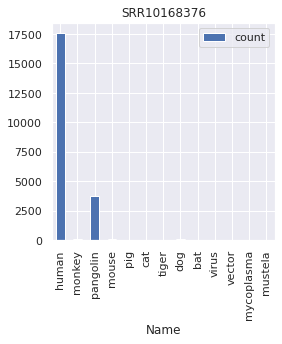

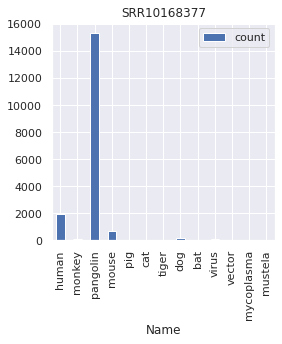

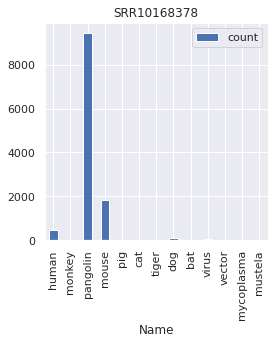

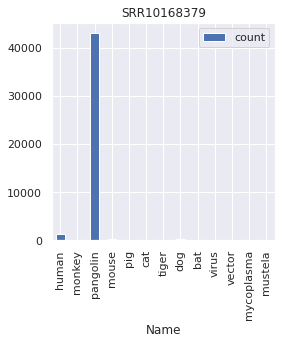

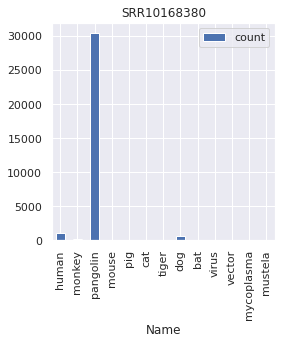

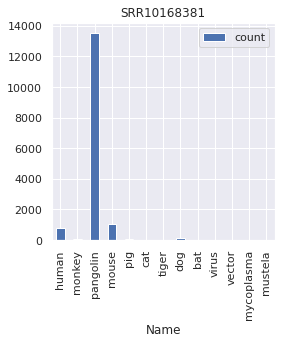

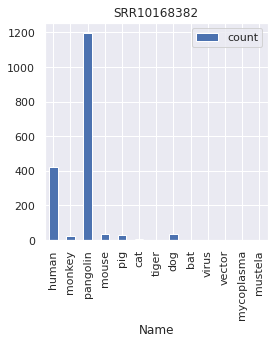

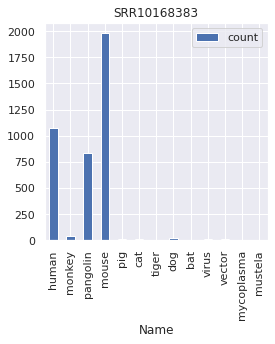

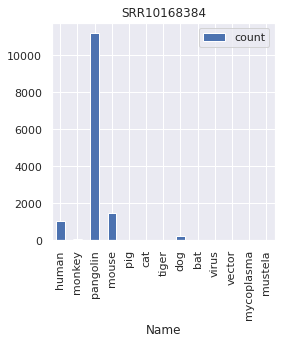

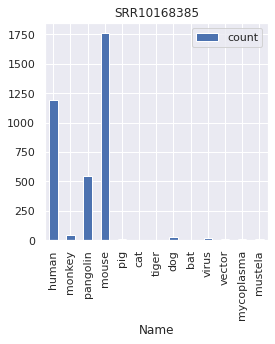

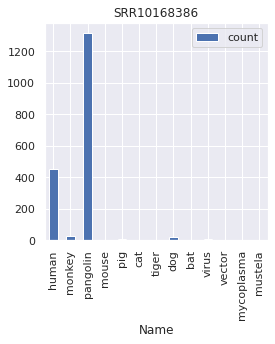

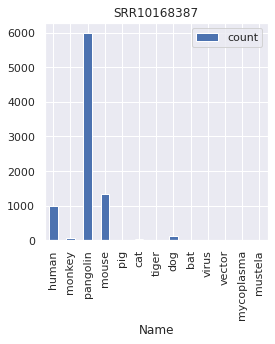

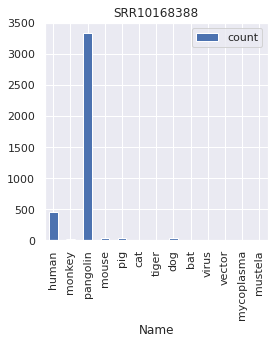

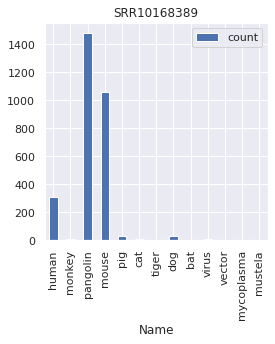

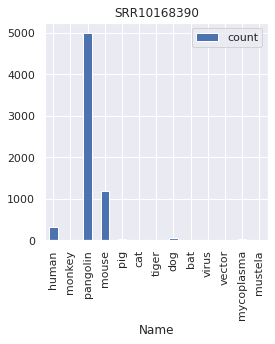

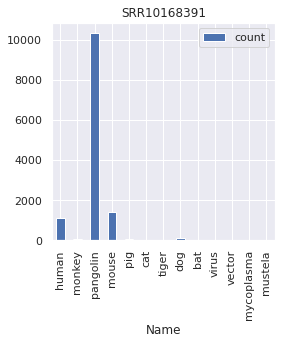

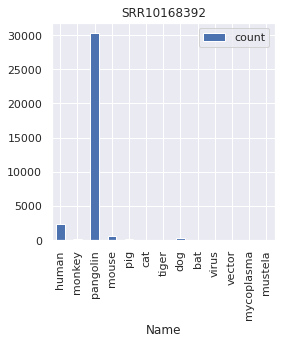

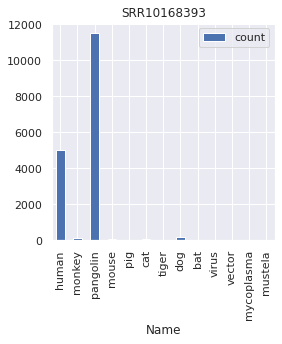

In [14]:
for sra in sra_list:
    try:
        df=get_descr(sra)
        df.to_csv(BASE_PATH+sra+'/magic_blast/'+f'{sra}_{dbname}_{kmer}_magicBLAST_species_df.csv')
        plot_df(df, sra)
    except FileNotFoundError:
        pass
    except AttributeError:
        pass

In [15]:
pathlib.Path(BASE_PATH+'general_plots/').mkdir(exist_ok=True)

def multi_plot():
    fig, axis = plt.subplots(5, 5,figsize=(16,16))
    fig.suptitle('Contig counts')
    n=0
    for r in range(5):
        for c in range(5):
            if n<len(sra_list):
                sra=sra_list[n]
                df=get_descr(sra)
                axis[r,c].bar(df['Name'],df['count'])
                axis[r,c].tick_params(axis='x', rotation=90)
                axis[r,c].set_ylabel('count')
                axis[r,c].title.set_text(sra)
                n+=1
    
    fig.tight_layout()
    fig.savefig(BASE_PATH+'general_plots/'+f'{sra}_{dbname}_{kmer}_magicBLAST_contig_count_matrix.png', bbox_inches="tight")
    plt.show()
    

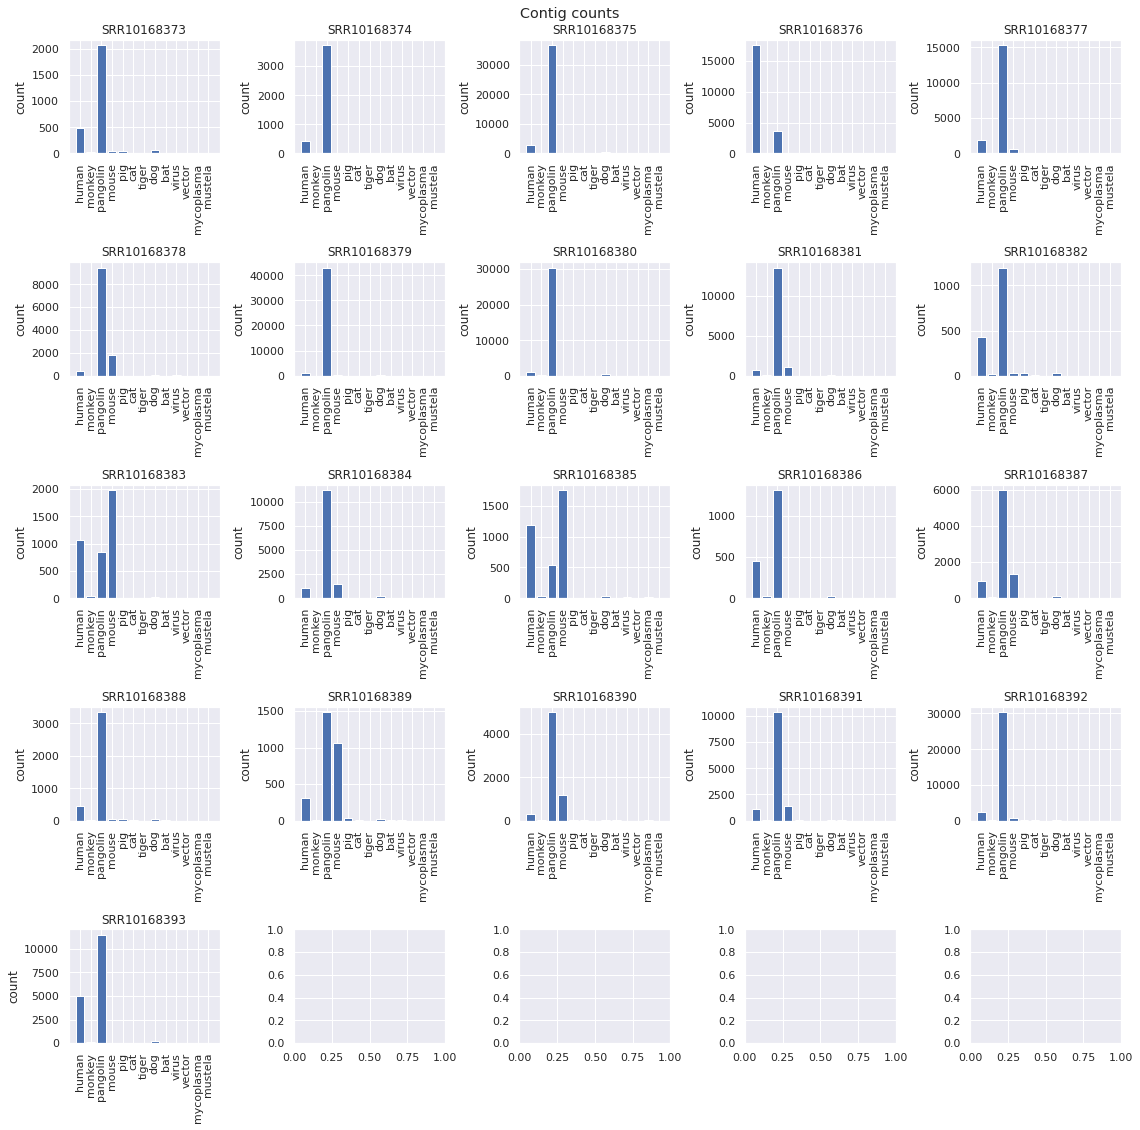

In [16]:
multi_plot()

In [17]:
frames=[]
for i,sra in enumerate(sra_list):
    try:
        df = pd.read_csv(BASE_PATH+sra+'/magic_blast/'+f'{sra}_{dbname}_{kmer}_magicBLAST_species_df.csv')
        x = df.Name.astype('category')
        df['species_uid'] =x.cat.codes
        df['SRA_val'] =df.SRA.str.strip('SRR')
        df['SRA_val'] = pd.to_numeric(df['SRA_val'])
        frames.append(df)
    except FileNotFoundError:
        pass
df_sra = pd.concat(frames)

In [18]:
df_sra.drop(columns=['Unnamed: 0'],inplace=True)

In [19]:
df_sra.head(n=100)

,SRA,Name,count,pct_matched,species_uid,SRA_val
0,SRR10168373,human,486,11.18,3,10168373
1,SRR10168373,monkey,21,0.48,4,10168373
2,SRR10168373,pangolin,2067,47.54,8,10168373
3,SRR10168373,mouse,53,1.22,5,10168373
4,SRR10168373,pig,51,1.17,9,10168373
...,...,...,...,...,...,...
4,SRR10168380,pig,52,0.16,9,10168380
5,SRR10168380,cat,66,0.20,1,10168380
6,SRR10168380,tiger,6,0.02,10,10168380
7,SRR10168380,dog,556,1.67,2,10168380


In [20]:
df_sra.Name.unique()

array(['human', 'monkey', 'pangolin', 'mouse', 'pig', 'cat', 'tiger',
       'dog', 'bat', 'virus', 'vector', 'mycoplasma', 'mustela'],
      dtype=object)

### All nt database matches

In [21]:
total_dict={}
asc_desc={}
for sra in sra_list:
    accessions, descriptions, counts, total=get_asc_descr_count(sra)
    for asc,desc,cnt in zip(accessions,descriptions, counts):
        if asc in total_dict:
            total_dict[asc]+=int(cnt)
        else:
            total_dict[asc]=int(cnt)
        if asc not in asc_desc:
            asc_desc[asc]=desc

In [22]:
assert len(total_dict)==len(asc_desc)

In [23]:
len(asc_desc)

74327

Print out the 100 most common nt database classification for all contigs in the project

In [24]:
def print_top_n_sp(total_dict, max_num):
    listofTuples = sorted(total_dict.items() , reverse=True, key=lambda x: x[1])
    for i, elem in enumerate(listofTuples):
        if i<max_num:
            print(asc_desc[elem[0]], ": " , elem[1] )
        else:
            break
    

In [25]:
print_top_n_sp(total_dict, max_num=10)

Pseudolabrys sp. FHR47 chromosome, complete genome :  858
Eukaryotic synthetic construct chromosome 16 :  841
Homo sapiens DNA, chromosome 16, nearly complete genome :  810
Lutra lutra genome assembly, chromosome: 16 :  656
Eukaryotic synthetic construct chromosome 17 :  554
Staphylococcus aureus strain WH9628 chromosome :  542
Homo sapiens DNA, chromosome 17, nearly complete genome :  527
Sus scrofa 18S ribosomal RNA gene, complete sequence :  516
Beta vulgaris subsp. vulgaris cultivar KWS2320 chloroplast, complete genome :  507
Homo sapiens clone LA14_101B3 sequence :  506


### Human

In [26]:
df=df_sra[df_sra['Name'].str.contains('human')]

count             AxesSubplot(0.125,0.71587;0.168478x0.16413)
pct_matched    AxesSubplot(0.327174,0.71587;0.168478x0.16413)
dtype: object

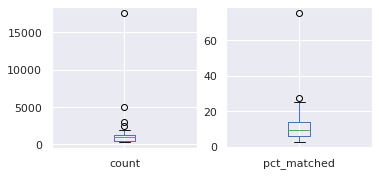

In [27]:
df.drop(columns=['Name'],inplace=True)
sns.set(rc={"figure.figsize":(6, 6)})
df_box=df[['count', 'pct_matched']]
df_box.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(12,12))

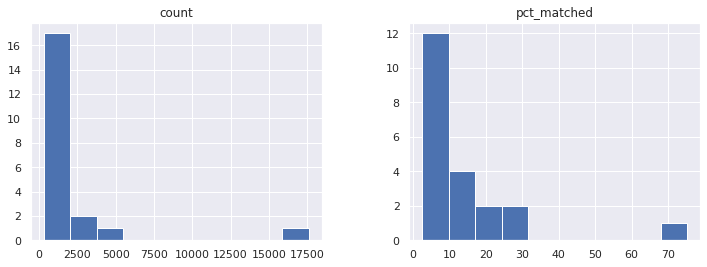

In [28]:
df_box.hist(figsize=(12,4))
plt.show()

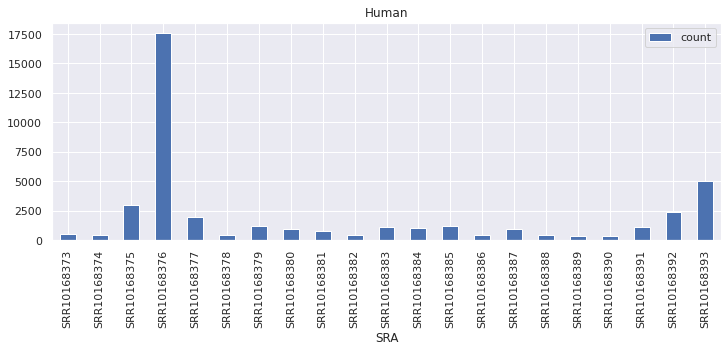

In [29]:
ax=df.plot(x='SRA', y='count', kind='bar',figsize=(12,4))
ax.set_title('Human', fontsize=12)
plt.show()

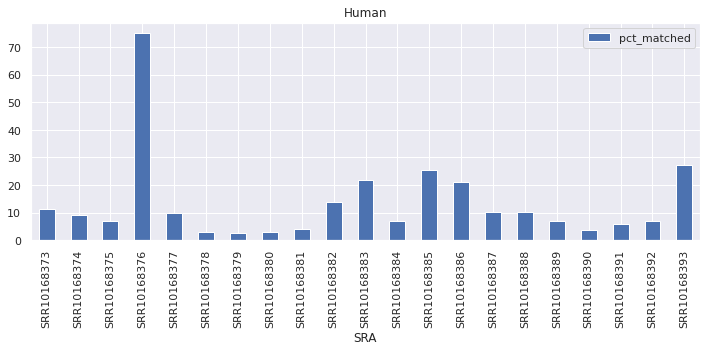

In [30]:
ax=df.plot(x='SRA', y='pct_matched', kind='bar',figsize=(12,4))
ax.set_title('Human', fontsize=12)
plt.show()

### Monkey

In [31]:
s_name='monkey'

In [32]:
df=df_sra[df_sra['Name'].str.contains(s_name)]

count             AxesSubplot(0.125,0.71587;0.168478x0.16413)
pct_matched    AxesSubplot(0.327174,0.71587;0.168478x0.16413)
dtype: object

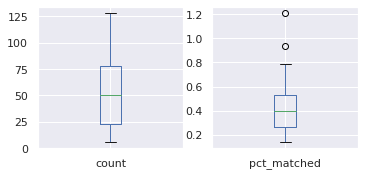

In [33]:
df.drop(columns=['Name'],inplace=True)
sns.set(rc={"figure.figsize":(6, 6)})
df_box=df[['count', 'pct_matched']]
df_box.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(12,12))

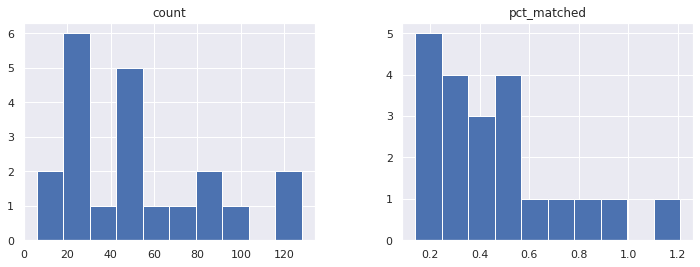

In [34]:
df_box.hist(figsize=(12,4))
plt.show()

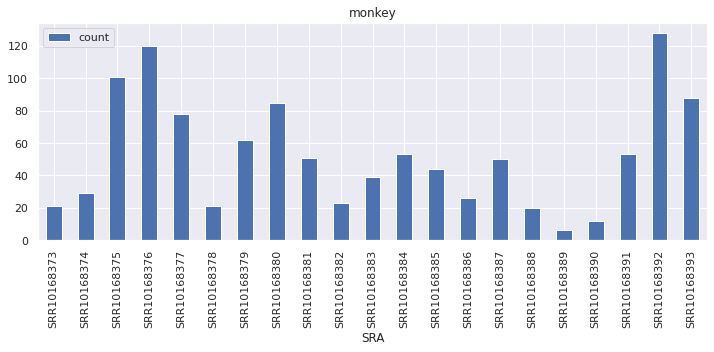

In [35]:
ax=df.plot(x='SRA', y='count', kind='bar',figsize=(12,4))
ax.set_title(s_name, fontsize=12)
plt.show()

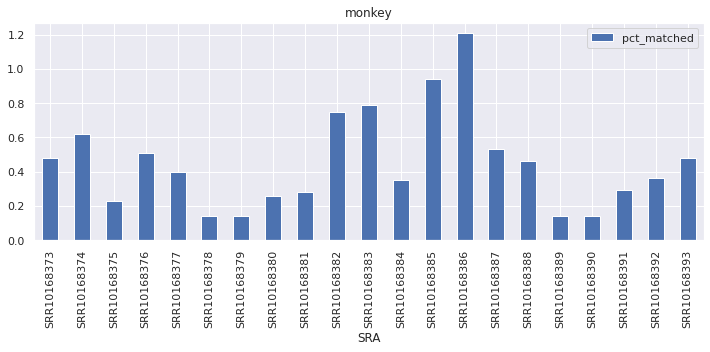

In [36]:
ax=df.plot(x='SRA', y='pct_matched', kind='bar',figsize=(12,4))
ax.set_title(s_name, fontsize=12)
plt.show()

### Pangolin

In [37]:
s_name='pangolin'

In [38]:
df=df_sra[df_sra['Name'].str.contains(s_name)]

count             AxesSubplot(0.125,0.71587;0.168478x0.16413)
pct_matched    AxesSubplot(0.327174,0.71587;0.168478x0.16413)
dtype: object

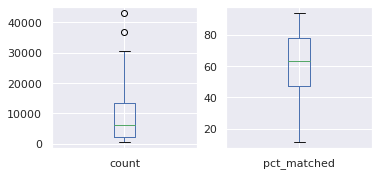

In [39]:
df.drop(columns=['Name'],inplace=True)
sns.set(rc={"figure.figsize":(6, 6)})
df_box=df[['count', 'pct_matched']]
df_box.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(12,12))

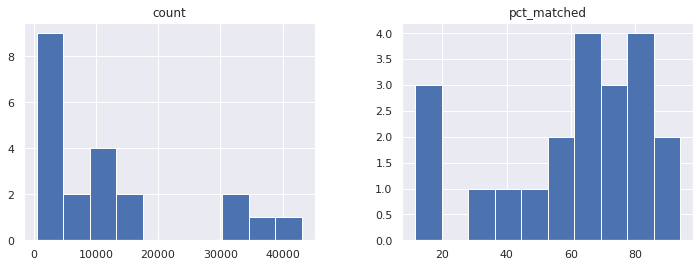

In [40]:
df_box.hist(figsize=(12,4))
plt.show()

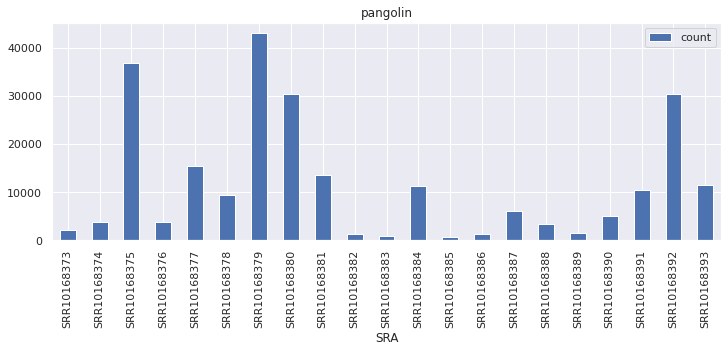

In [41]:
ax=df.plot(x='SRA', y='count', kind='bar',figsize=(12,4))
ax.set_title(s_name, fontsize=12)
plt.show()

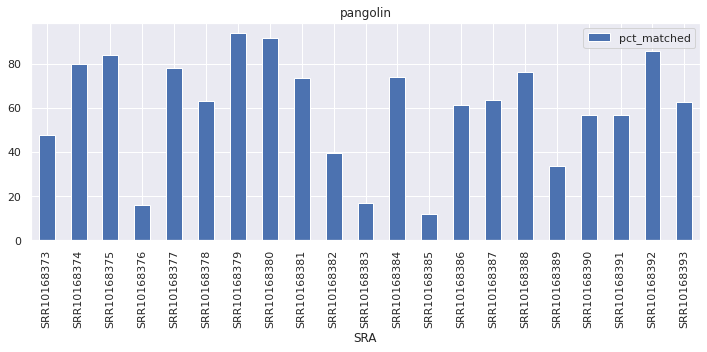

In [42]:
ax=df.plot(x='SRA', y='pct_matched', kind='bar',figsize=(12,4))
ax.set_title(s_name, fontsize=12)
plt.show()

### Mouse

In [43]:
s_name='mouse'

In [44]:
df=df_sra[df_sra['Name'].str.contains(s_name)]

count             AxesSubplot(0.125,0.71587;0.168478x0.16413)
pct_matched    AxesSubplot(0.327174,0.71587;0.168478x0.16413)
dtype: object

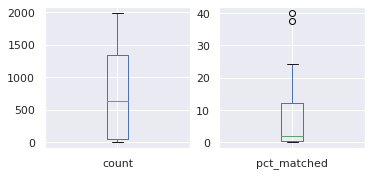

In [45]:
df.drop(columns=['Name'],inplace=True)
sns.set(rc={"figure.figsize":(6, 6)})
df_box=df[['count', 'pct_matched']]
df_box.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(12,12))

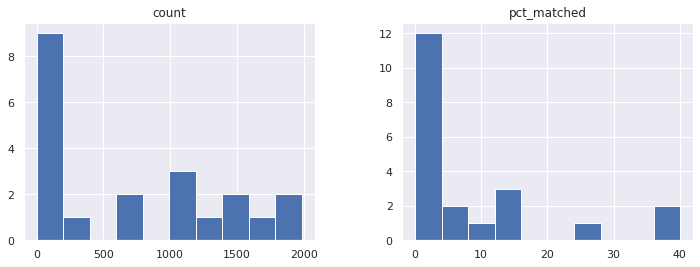

In [46]:
df_box.hist(figsize=(12,4))
plt.show()

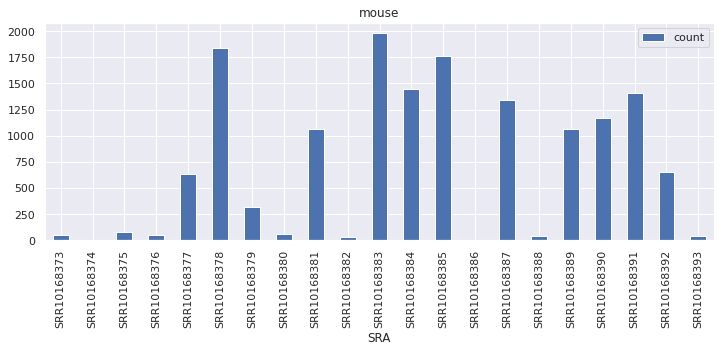

In [47]:
ax=df.plot(x='SRA', y='count', kind='bar',figsize=(12,4))
ax.set_title(s_name, fontsize=12)
plt.show()

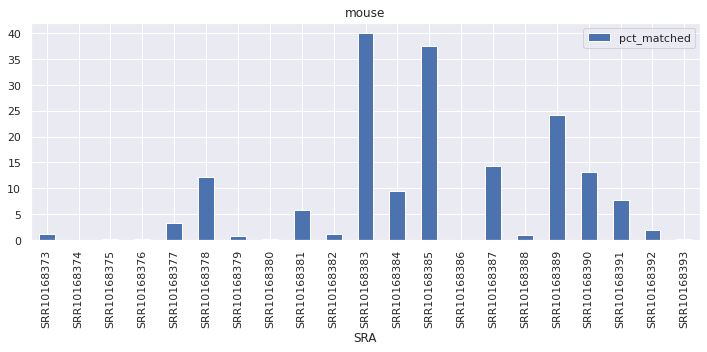

In [48]:
ax=df.plot(x='SRA', y='pct_matched', kind='bar',figsize=(12,4))
ax.set_title(s_name, fontsize=12)
plt.show()

### virus

In [49]:
s_name='virus'

In [50]:
df=df_sra[df_sra['Name'].str.contains(s_name)]

count             AxesSubplot(0.125,0.71587;0.168478x0.16413)
pct_matched    AxesSubplot(0.327174,0.71587;0.168478x0.16413)
dtype: object

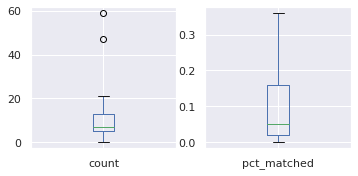

In [51]:
df.drop(columns=['Name'],inplace=True)
sns.set(rc={"figure.figsize":(6, 6)})
df_box=df[['count', 'pct_matched']]
df_box.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(12,12))

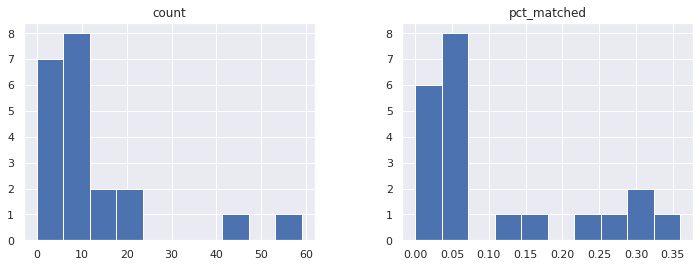

In [52]:
df_box.hist(figsize=(12,4))
plt.show()

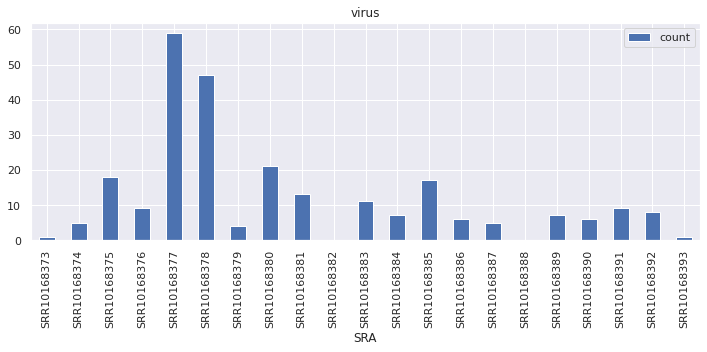

In [53]:
ax=df.plot(x='SRA', y='count', kind='bar',figsize=(12,4))
ax.set_title(s_name, fontsize=12)
plt.show()

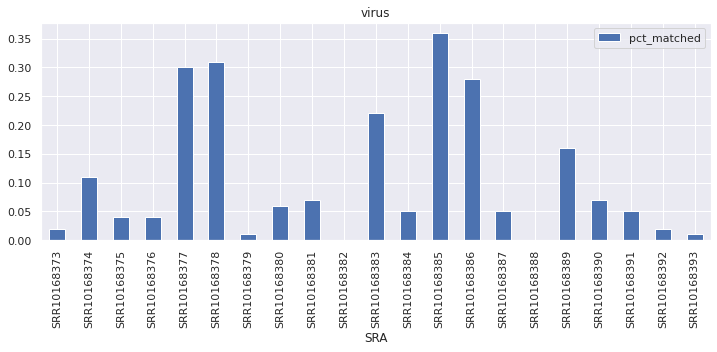

In [54]:
ax=df.plot(x='SRA', y='pct_matched', kind='bar',figsize=(12,4))
ax.set_title(s_name, fontsize=12)
plt.show()

### Top nt database contigs matches per SRA

In [55]:
def get_sra_dict(sra):
    total_dict={}
    asc_desc={}
    accessions, descriptions, counts, total=get_asc_descr_count(sra)
    for asc,desc,cnt in zip(accessions,descriptions, counts):
        if asc in total_dict:
            total_dict[asc]+=int(cnt)
        else:
            total_dict[asc]=int(cnt)
        if asc not in asc_desc:
            asc_desc[asc]=desc
    return total_dict, asc_desc, total

In [56]:
for sra in sra_list:
    total_dict, asc_desc, total= get_sra_dict(sra) 
    print(f'{sra}, number of contigs {total}')
    print_top_n_sp(total_dict, max_num=10)
    print('\n')

SRR10168373, number of contigs 2117
Manis javanica isolate EP2 mitochondrion, complete genome :  151
Manis javanica isolate T298 mitochondrion, complete genome :  150
Manis javanica isolate MJA633 mitochondrion, complete genome :  140
Manis pentadactyla mitochondrion, complete genome :  101
Manis javanica isolate MP_PG03-UM mitochondrion, complete genome :  100
Sphingomonas paucimobilis strain FDAARGOS_908 chromosome, complete genome :  62
Sphingomonas paucimobilis strain FDAARGOS_881 chromosome, complete genome :  58
Lutra lutra genome assembly, chromosome: 16 :  50
Sphingomonas sp. LK11, complete genome :  49
Staphylococcus aureus strain WH9628 chromosome :  49


SRR10168374, number of contigs 3784
Fusobacterium varium ATCC 27725 chromosome, complete genome :  10
Fusobacterium varium strain NCTC10560 genome assembly, chromosome: 1 :  10
Fusobacterium ulcerans ATCC 49185 isolate Fusobacterium ulcerans 81A6 genome assembly, chromosome: 1 :  10
PREDICTED: Manis javanica AHNAK nucleoprot

SRR10168388, number of contigs 3512
Lutra lutra genome assembly, chromosome: 16 :  42
Mus musculus clone contig 1 chromocenter region genomic sequence :  39
Staphylococcus aureus strain WH9628 chromosome :  39
Human DNA sequence from clone bP-2171C21 on chromosome 21, complete sequence :  39
Homo sapiens clone N29M24 sequence :  39
Homo sapiens clone LA15_25H3 sequence :  39
Homo sapiens clone LA14_101B3 sequence :  39
Homo sapiens clone LA13_165F6 sequence :  39
Mouse DNA sequence from clone RP23-81C12 on chromosome 17, complete sequence :  39
Ovis canadensis canadensis isolate 43U chromosome 24 sequence :  39


SRR10168389, number of contigs 3544
Clostridium baratii strain CDC51267 chromosome, complete genome :  57
Clostridium baratii str. Sullivan, complete genome :  51
Lutra lutra genome assembly, chromosome: 16 :  33
Staphylococcus aureus strain WH9628 chromosome :  29
Sus scrofa 18S ribosomal RNA gene, complete sequence :  27
Homo sapiens clone N29M24 sequence :  26
Homo sapiens 

In [57]:
### Get specific contigs matching a species/name

In [58]:
def write_contigs(sra, match_names): 
    accessions, descriptions, counts, total=get_asc_descr_count(sra)
    asc_matches=[]
    for m in match_names:
        for a,d in zip(accessions, descriptions):
            if m.lower() in d.lower():
                asc_matches.append(a)
    gi_matches=[]
    for a in asc_matches:
        idx=ACCESSIONS.index(a)
        gi=GIS[idx]
        gi_matches.append(gi)
    contigs=[]
    path = BASE_PATH+sra+'/magic_blast/'
    subset_f = open(path+f'{sra}_{match_names[0].replace(" ", "_")}_subset_{f_contigs_file_tail}', 'w')
    with open(path+f'{sra}{f_contigs_file_tail}', 'r') as f:
        lines = [line for line in f]
        for line in lines:
            for gi in gi_matches:
                if gi in line: 
                    parts=line.split('\t')
                    idx=GIS.index(gi)
                    asc=ACCESSIONS[idx]
                    t=TITLES[idx]
                    ps=parts[:2]
                    pe=parts[3:]
                    ps.append(asc+' '+t.rstrip('\n'))
                    parts=ps+pe
                    p='\t'.join(parts)
                    subset_f.write(p)
    subset_f.close()

In [59]:
#set_accessions() 
#assert ACCESSIONS is not None

In [60]:
#match_names=['vector']
#for sra in sra_list:
#    write_contigs(sra, match_names)

In [61]:
#match_names=['plasmid']
#for sra in sra_list:
#    write_contigs(sra, match_names)

In [62]:
#match_names=['mustela']
#for sra in sra_list:
#    write_contigs(sra, match_names)

In [63]:
#match_names=['virus']
#for sra in sra_list:
#    write_contigs(sra, match_names)